In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, display
import time
import pyttsx3
import pandas as pd
import seaborn as sns

In [2]:
# --- Inisialisasi Variabel dari NIM ---
a, b, c, d, e = 20, 23, 3, 12, 6

In [3]:
# --- Pembuatan Graph ---
edges = [
    ("A", "B", a),
    ("B", "C", b),
    ("A", "D", c),
    ("B", "D", d),
    ("B", "E", abs(d - e)),
    ("C", "E", abs(b - e)),
    ("D", "E", abs(d + b)),
    ("D", "F", e),
    ("E", "F", abs(c + e)),
    ("E", "G", abs(d - e - a)),
    ("F", "G", abs(c - e))
]

pos_fixed = {
    "A": (0, 2),
    "B": (2, 2.5),
    "C": (4, 3),
    "D": (1, 0),
    "E": (3, 1.5),
    "F": (2.5, -1),
    "G": (4, -1.2)
}

G = nx.Graph()
G.add_weighted_edges_from(edges)

In [4]:
# --- Fungsi Visualisasi Biasa ---
def plot_graph_with_highlight(title, edges_highlighted, color, G, pos):
    plt.figure(figsize=(8, 6))
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color="#ffffcc", node_size=1200,
            edge_color='gray', width=1.5, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)
    nx.draw_networkx_edges(G, pos, edgelist=edges_highlighted, edge_color=color, width=3)
    plt.title(title)
    plt.grid(True)
    plt.gca().set_axisbelow(True)
    plt.tight_layout()
    plt.show()

In [5]:
# --- Fungsi Visualisasi Animasi ---
def animate_mst_building_interactive(G, mst_edges, pos, color="green", title="Animasi Proses MST"):
    fig, ax = plt.subplots(figsize=(6, 4))
    labels = nx.get_edge_attributes(G, 'weight')

    def draw_base():
        ax.clear()
        nx.draw_networkx_nodes(G, pos, ax=ax, node_color='lightblue', node_size=800)
        nx.draw_networkx_labels(G, pos, ax=ax)
        nx.draw_networkx_edges(G, pos, ax=ax, edge_color='lightgray', style='dotted')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
        ax.set_title(title)
        ax.grid(True)
        ax.set_axisbelow(True)
        ax.set_xticks(range(-1, 6))
        ax.set_yticks(range(-2, 4))

    def update(i):
        draw_base()
        nx.draw_networkx_edges(G, pos, edgelist=mst_edges[:i+1], edge_color=color, width=2.5, ax=ax)
        ax.set_title(f"{title} - Edge ke-{i+1} / {len(mst_edges)}")
        return ax,

    ani = animation.FuncAnimation(fig, update, frames=len(mst_edges), interval=1000, repeat=False)
    plt.close(fig)
    return HTML(ani.to_jshtml())


In [6]:
# --- Statistik MST dan Dijkstra ---
def get_mst_stats(name, edges, exec_time):
    total_weight = sum(G[u][v]['weight'] for u, v in edges)
    edge_count = len(edges)
    avg_weight = total_weight / edge_count if edge_count else 0
    return {
        "Algoritma": name,
        "Total Bobot": total_weight,
        "Jumlah Edge": edge_count,
        "Rata-rata Bobot": round(avg_weight, 2),
        "Waktu Eksekusi (s)": round(exec_time, 6)
    }

stats = []

C:\Users\HAFIZ\AppData\Local\Temp\ipykernel_22896\1287355712.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


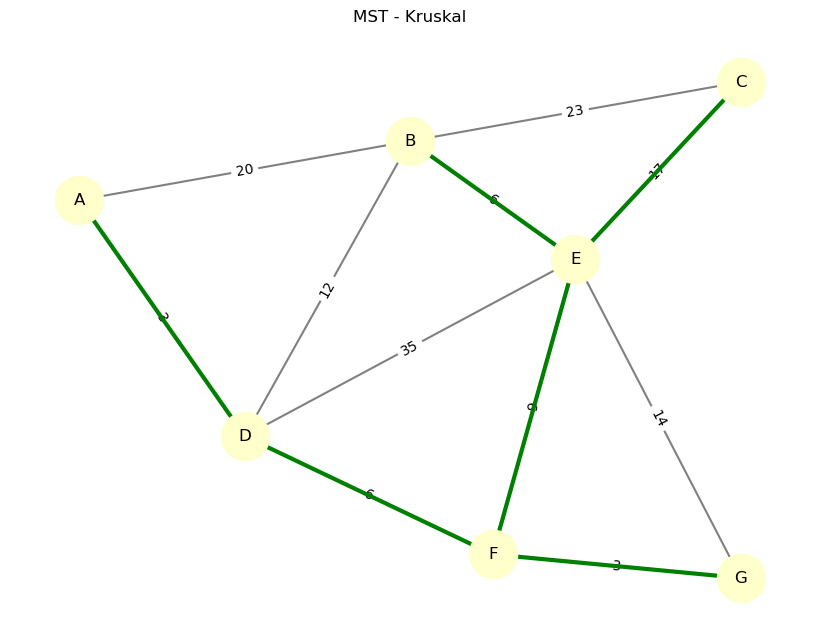

In [7]:
# --- KRUSKAL ---
start = time.time()
kruskal_mst = list(nx.minimum_spanning_edges(G, algorithm='kruskal', data=True))
end = time.time()
edges_kruskal = [(u, v) for u, v, _ in kruskal_mst]
stats.append(get_mst_stats("Kruskal", edges_kruskal, end - start))
plot_graph_with_highlight("MST - Kruskal", edges_kruskal, "green", G, pos_fixed)
html_kruskal = animate_mst_building_interactive(G, edges_kruskal, pos_fixed, "green", "Animasi Kruskal")

C:\Users\HAFIZ\AppData\Local\Temp\ipykernel_22896\1287355712.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


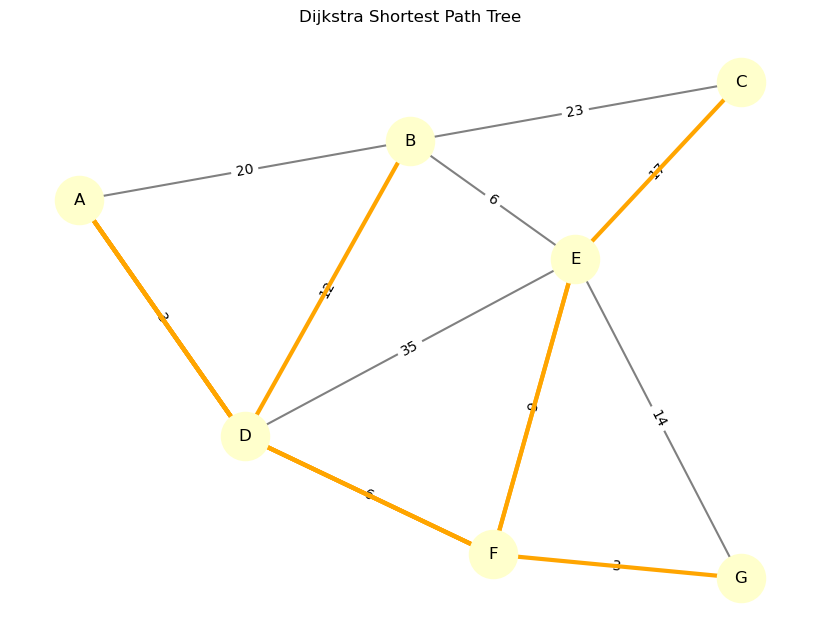

In [8]:
# --- DIJKSTRA ---
start = time.time()
dijkstra_path = nx.single_source_dijkstra_path(G, source="A")
dijkstra_edges = []
for dest in dijkstra_path:
    path = dijkstra_path[dest]
    dijkstra_edges += list(zip(path[:-1], path[1:]))
end = time.time()
stats.append(get_mst_stats("Dijkstra", dijkstra_edges, end - start))
plot_graph_with_highlight("Dijkstra Shortest Path Tree", dijkstra_edges, "orange", G, pos_fixed)
html_dijkstra = animate_mst_building_interactive(G, dijkstra_edges, pos_fixed, "orange", "Animasi Dijkstra")

In [9]:
# --- TABEL RINGKASAN ---
df_stats = pd.DataFrame(stats)
display(df_stats)

,Algoritma,Total Bobot,Jumlah Edge,Rata-rata Bobot,Waktu Eksekusi (s)
0,Kruskal,44,6,7.33,0.000000
1,Dijkstra,92,15,6.13,0.001009


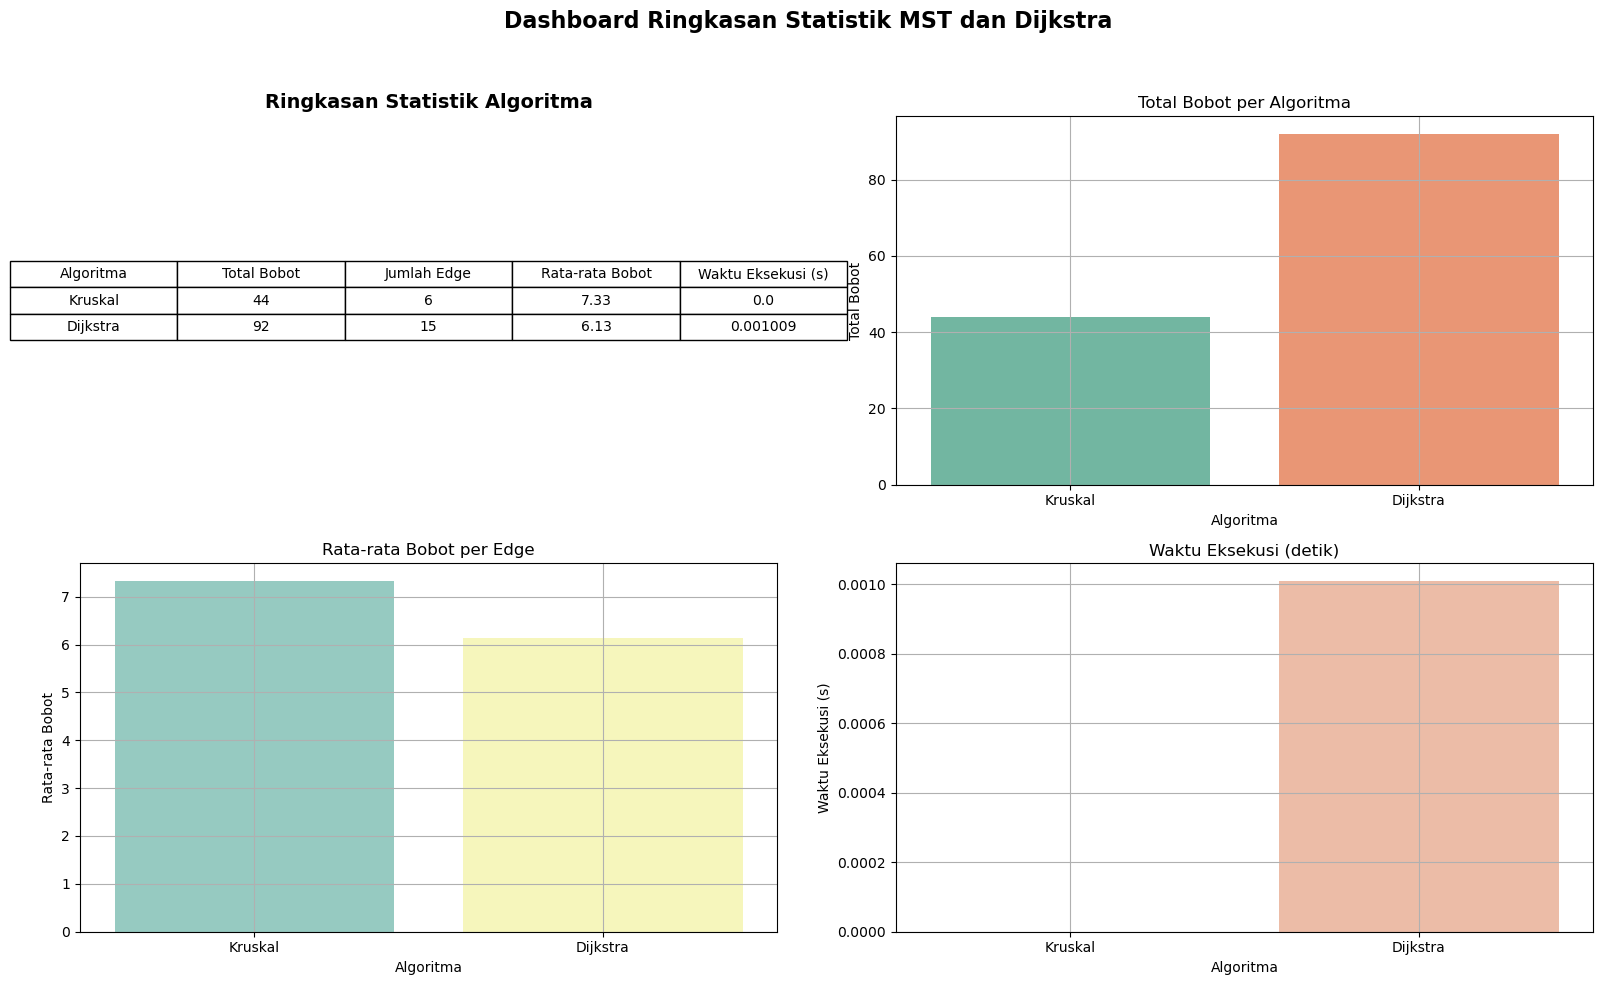

In [10]:
# --- DASHBOARD ---
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2)

# Tabel
ax0 = fig.add_subplot(gs[0, 0])
ax0.axis('off')
table = ax0.table(cellText=df_stats.values,
                  colLabels=df_stats.columns,
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
ax0.set_title("Ringkasan Statistik Algoritma", fontweight='bold', fontsize=14)

# Barplot Total Bobot
ax1 = fig.add_subplot(gs[0, 1])
sns.barplot(data=df_stats, x="Algoritma", y="Total Bobot", hue="Algoritma", palette="Set2", ax=ax1, legend=False)

ax1.set_title("Total Bobot per Algoritma")
ax1.grid(True)

# Rata-rata Bobot
ax2 = fig.add_subplot(gs[1, 0])
sns.barplot(data=df_stats, x="Algoritma", y="Rata-rata Bobot", hue="Algoritma", palette="Set3", ax=ax2, legend=False)
ax2.set_title("Rata-rata Bobot per Edge")
ax2.grid(True)

# Waktu Eksekusi
ax3 = fig.add_subplot(gs[1, 1])
sns.barplot(data=df_stats, x="Algoritma", y="Waktu Eksekusi (s)", hue="Algoritma", palette="coolwarm", ax=ax3, legend=False)
ax3.set_title("Waktu Eksekusi (detik)")
ax3.grid(True)

plt.suptitle("Dashboard Ringkasan Statistik MST dan Dijkstra", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

VERSI 2 DARI MST KE 4

In [11]:
# MST dan Dijkstra Visualisasi dan Statistik

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, display
import time
import pandas as pd
import seaborn as sns

In [12]:
# --- Inisialisasi Variabel dari NIM ---
a, b, c, d, e = 20, 23, 3, 12, 6

# --- Pembuatan Graph ---
edges = [
    ("A", "B", a),
    ("B", "C", b),
    ("A", "D", c),
    ("B", "D", d),
    ("B", "E", abs(d - e)),
    ("C", "E", abs(b - e)),
    ("D", "E", abs(d + b)),
    ("D", "F", e),
    ("E", "F", abs(c + e)),
    ("E", "G", abs(d - e - a)),
    ("F", "G", abs(c - e))
]

pos_fixed = {
    "A": (0, 2),
    "B": (2, 2.5),
    "C": (4, 3),
    "D": (1, 0),
    "E": (3, 1.5),
    "F": (2.5, -1),
    "G": (4, -1.2)
}

G = nx.Graph()
G.add_weighted_edges_from(edges)

In [13]:
# --- Fungsi Visualisasi Biasa ---
def plot_graph_with_highlight(title, edges_highlighted, color, G, pos):
    plt.figure(figsize=(8, 6))
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color="#ffffcc", node_size=1200,
            edge_color='gray', width=1.5, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)
    nx.draw_networkx_edges(G, pos, edgelist=edges_highlighted, edge_color=color, width=3)
    plt.title(title)
    plt.grid(True)
    plt.gca().set_axisbelow(True)
    plt.tight_layout()
    plt.show()

In [14]:
# --- Fungsi Visualisasi Animasi Umum ---
def animate_mst_building_interactive(G, mst_edges, pos, color="green", title="Animasi Proses MST"):
    fig, ax = plt.subplots(figsize=(6, 4))
    labels = nx.get_edge_attributes(G, 'weight')

    def draw_base():
        ax.clear()
        nx.draw_networkx_nodes(G, pos, ax=ax, node_color='lightblue', node_size=800)
        nx.draw_networkx_labels(G, pos, ax=ax)
        nx.draw_networkx_edges(G, pos, ax=ax, edge_color='lightgray', style='dotted')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
        ax.set_title(title)
        ax.grid(True)
        ax.set_axisbelow(True)

    def update(i):
        draw_base()
        nx.draw_networkx_edges(G, pos, edgelist=mst_edges[:i+1], edge_color=color, width=2.5, ax=ax)
        ax.set_title(f"{title} - Edge ke-{i+1} / {len(mst_edges)}")
        return ax,

    ani = animation.FuncAnimation(fig, update, frames=len(mst_edges), interval=1000, repeat=False)
    plt.close(fig)
    return HTML(ani.to_jshtml())


In [15]:
# --- ANIMASI: Sollin (Boruvka) ---
def animate_sollin(G, pos, title="Animasi MST - Sollin (Boruvka)"):
    parent = {n: n for n in G.nodes()}
    rank = {n: 0 for n in G.nodes()}

    def find(u):
        while parent[u] != u:
            parent[u] = parent[parent[u]]
            u = parent[u]
        return u

    def union(u, v):
        u_root, v_root = find(u), find(v)
        if u_root == v_root: return
        if rank[u_root] < rank[v_root]:
            parent[u_root] = v_root
        else:
            parent[v_root] = u_root
            if rank[u_root] == rank[v_root]:
                rank[u_root] += 1

    sollin_edges = []
    frames = []

    while len(set(find(n) for n in G.nodes())) > 1:
        cheapest = {}
        for u, v, data in G.edges(data=True):
            ru, rv = find(u), find(v)
            if ru != rv:
                if ru not in cheapest or data['weight'] < G[cheapest[ru][0]][cheapest[ru][1]]['weight']:
                    cheapest[ru] = (u, v)
                if rv not in cheapest or data['weight'] < G[cheapest[rv][0]][cheapest[rv][1]]['weight']:
                    cheapest[rv] = (u, v)

        newly_added = []
        for u, v in set(cheapest.values()):
            if find(u) != find(v):
                union(u, v)
                sollin_edges.append((u, v))
                newly_added.append((u, v))
        if newly_added:
            frames.append(sollin_edges.copy())

    fig, ax = plt.subplots(figsize=(6, 4))
    labels = nx.get_edge_attributes(G, 'weight')

    def draw_base():
        ax.clear()
        nx.draw_networkx_nodes(G, pos, ax=ax, node_color='lightgreen', node_size=800)
        nx.draw_networkx_labels(G, pos, ax=ax)
        nx.draw_networkx_edges(G, pos, ax=ax, edge_color='lightgray', style='dotted')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
        ax.grid(True)
        ax.set_axisbelow(True)

    def update(i):
        draw_base()
        nx.draw_networkx_edges(G, pos, edgelist=frames[i], edge_color='purple', width=3, ax=ax)
        ax.set_title(f"{title} - Iterasi {i+1} / {len(frames)}")
        return ax,

    ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=1200, repeat=False)
    plt.close(fig)
    return HTML(ani.to_jshtml

    

SyntaxError: incomplete input (2967813290.py, line 66)

In [ ]:
# --- Jalankan Semua dan Tampilkan ---
kruskal_mst = list(nx.minimum_spanning_edges(G, algorithm='kruskal', data=True))
edges_kruskal = [(u, v) for u, v, _ in kruskal_mst]
display(animate_mst_building_interactive(G, edges_kruskal, pos_fixed, "green", "Animasi Kruskal"))

prim_mst = list(nx.minimum_spanning_edges(G, algorithm='prim', data=True))
edges_prim = [(u, v) for u, v, _ in prim_mst]
display(animate_mst_building_interactive(G, edges_prim, pos_fixed, "blue", "Animasi Prim"))

dijkstra_path = nx.single_source_dijkstra_path(G, source="A")
dijkstra_edges = []
for dest in dijkstra_path:
    path = dijkstra_path[dest]
    dijkstra_edges += list(zip(path[:-1], path[1:]))
display(animate_mst_building_interactive(G, dijkstra_edges, pos_fixed, "orange", "Animasi Dijkstra"))

display(animate_sollin(G, pos_fixed, title="Animasi MST - Sollin (Boruvka)"))

In [ ]:
# --- DataFrame Statistik ---
df_stats = pd.DataFrame(stats)
display(df_stats)

# --- Visualisasi ---
plt.figure(figsize=(12, 5))
sns.barplot(data=df_stats, x="Algoritma", y="Total Bobot", palette="Set2")
plt.title("Total Bobot per Algoritma MST")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(data=df_stats, x="Algoritma", y="Rata-rata Bobot", palette="Set3")
plt.title("Rata-rata Bobot Edge per Algoritma")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(data=df_stats, x="Algoritma", y="Waktu Eksekusi (s)", palette="coolwarm")
plt.title("Waktu Eksekusi per Algoritma")
plt.grid(True)
plt.show()